In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas  as pd
from   keras.models import Sequential
from   keras.layers import Dense             # i.e.fully connected
import tensorflow as tf

In [2]:
df = pd.read_csv("/content/training.csv", on_bad_lines='skip', skiprows=1)
df = df.sample(frac=1) #shuffle
df.sample(5)
df.shape

(36573, 11)

In [3]:
df.drop_duplicates(keep= 'first', inplace=True) #eliminarea dublurilor liniilor
print('Null values in dataset are',len(df[df.isnull().any(1)]))
df.shape

Null values in dataset are 0


(36573, 11)

In [4]:
X = df.drop(['Pozitie', 'Severitate def', 'Severitate inc.'], axis = 1)
y = df[['Pozitie']].values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [6]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [7]:
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 10, kernel_initializer='normal', activation = 'LeakyReLU'))

# Adding the first hidden layer
model.add(Dense(units = 20, kernel_initializer='normal', activation = 'LeakyReLU'))

#Adding second hidden layer
model.add(Dense(units = 20, kernel_initializer='normal', activation = 'LeakyReLU'))
model.add(Dense(units = 20, kernel_initializer='normal', activation = 'LeakyReLU'))

# Adding the output layer
model.add(Dense(units = 1, kernel_initializer='normal', activation = 'linear'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = root_mean_squared_error)# metrics = ['accuracy'])

In [8]:
history = model.fit(X_train, y_train, batch_size = 64, epochs = 1000, verbose = 2)

Epoch 1/1000
458/458 - 3s - loss: 0.3114 - 3s/epoch - 6ms/step
Epoch 2/1000
458/458 - 1s - loss: 0.2361 - 1s/epoch - 3ms/step
Epoch 3/1000
458/458 - 1s - loss: 0.1835 - 1s/epoch - 3ms/step
Epoch 4/1000
458/458 - 1s - loss: 0.1699 - 1s/epoch - 3ms/step
Epoch 5/1000
458/458 - 1s - loss: 0.1664 - 1s/epoch - 2ms/step
Epoch 6/1000
458/458 - 1s - loss: 0.1604 - 1s/epoch - 2ms/step
Epoch 7/1000
458/458 - 1s - loss: 0.1570 - 1s/epoch - 3ms/step
Epoch 8/1000
458/458 - 1s - loss: 0.1508 - 1s/epoch - 3ms/step
Epoch 9/1000
458/458 - 1s - loss: 0.1456 - 1s/epoch - 3ms/step
Epoch 10/1000
458/458 - 1s - loss: 0.1413 - 1s/epoch - 2ms/step
Epoch 11/1000
458/458 - 1s - loss: 0.1382 - 1s/epoch - 3ms/step
Epoch 12/1000
458/458 - 1s - loss: 0.1356 - 1s/epoch - 3ms/step
Epoch 13/1000
458/458 - 1s - loss: 0.1311 - 1s/epoch - 3ms/step
Epoch 14/1000
458/458 - 1s - loss: 0.1304 - 1s/epoch - 3ms/step
Epoch 15/1000
458/458 - 1s - loss: 0.1259 - 1s/epoch - 3ms/step
Epoch 16/1000
458/458 - 2s - loss: 0.1263 - 2s/ep

In [18]:
import pickle
with open('/trainHistoryDict', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [10]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model mean absolute error')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train data', 'validation data'], loc='upper right')
# plt.savefig('/loss.pdf')  
# plt.show()

In [19]:

tabel4_lucrare = pd.read_csv("/content/date_tabel4_v4csv.csv", on_bad_lines='skip')
tabel4_lucrare.head(10)

,Pozitie,Severitate def,Severitate inc.,Mod 1,Mod 2,Mod 3,Mod 4,Mod 5,Mod 6,Mod 7,Mod 8
0,0.100,0.003346,0.000000,0.002393,0.001227,0.000540,0.000099,0.000015,0.000075,0.000336,0.000652
1,0.150,0.003346,0.000000,0.001899,0.000254,0.000038,0.000552,0.001173,0.001254,0.000798,0.000219
2,0.400,0.003346,0.000000,0.000644,0.001020,0.000683,0.000299,0.001480,0.000037,0.001166,0.000771
3,0.550,0.003346,0.000000,0.000240,0.001535,0.000256,0.001080,0.000632,0.000640,0.001072,0.000240
4,0.613,0.003346,0.000000,0.000141,0.001343,0.000991,0.000146,0.001467,0.000171,0.000805,0.001136
5,0.133,0.003346,0.001673,0.002224,0.000466,0.000003,0.000336,0.001015,0.001417,0.001310,0.000770
6,0.280,0.005124,0.001673,0.004237,0.002804,0.004348,0.003654,0.002554,0.003922,0.004598,0.002963
7,0.410,0.003346,0.001673,0.002522,0.003063,0.002483,0.002346,0.003381,0.001844,0.003377,0.002300
8,0.570,0.003346,0.001673,0.000218,0.001670,0.000507,0.000837,0.001160,0.000208,0.001627,0.000020
9,0.962,0.001191,0.004333,0.000412,0.000412,0.000414,0.000419,0.000429,0.000446,0.000472,0.000507


In [20]:
X = tabel4_lucrare.drop(['Pozitie','Severitate def', 'Severitate inc.'], axis = 1)
y = tabel4_lucrare[['Pozitie']].values

In [13]:
X = np.asarray(X).astype('float32')

In [21]:
prediction = model.predict(X)

print("prediction shape:", prediction)

prediction shape: [[0.08328892]
 [0.16118607]
 [0.41487467]
 [0.5364729 ]
 [0.5894057 ]
 [0.15026575]
 [0.2580875 ]
 [0.37020174]
 [0.57289743]
 [1.029092  ]]


In [15]:
train_error =  np.abs(y - prediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

std_error:  0.017319235118590164
mean_error:  0.022885910618305215
min_error:  0.0028974342346191895
max_error:  0.06709195423126224


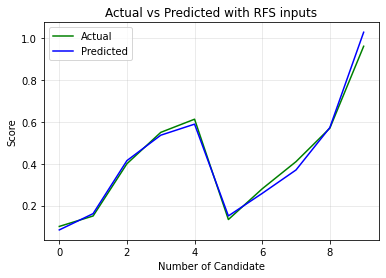

In [24]:
#Visualising the Acutal and predicted Result
plt.plot(y, color = 'green', label = 'Actual')
plt.plot(prediction, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.xlabel('Number of Candidate')
plt.ylabel('Score')
plt.title('Actual vs Predicted with RFS inputs')
plt.legend()
plt.show()

In [25]:
#tabel4_lucrare.head(10)
for i in range (0,len(y)):
  print('Val pozitiei din tabel{0} si val pozitiei prezisa de model {1}'.format(y[i], prediction[i]))



Val pozitiei din tabel[0.1] si val pozitiei prezisa de model [0.08328892]
Val pozitiei din tabel[0.15] si val pozitiei prezisa de model [0.16118607]
Val pozitiei din tabel[0.4] si val pozitiei prezisa de model [0.41487467]
Val pozitiei din tabel[0.55] si val pozitiei prezisa de model [0.5364729]
Val pozitiei din tabel[0.613] si val pozitiei prezisa de model [0.5894057]
Val pozitiei din tabel[0.133] si val pozitiei prezisa de model [0.15026575]
Val pozitiei din tabel[0.28] si val pozitiei prezisa de model [0.2580875]
Val pozitiei din tabel[0.41] si val pozitiei prezisa de model [0.37020174]
Val pozitiei din tabel[0.57] si val pozitiei prezisa de model [0.57289743]
Val pozitiei din tabel[0.962] si val pozitiei prezisa de model [1.029092]
